# Scipy : high-level scientific computing

### Numerical integration: `scipy.integrate:`

#### Function integrals

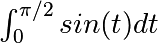

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
print(np.allclose(res, 1))   # res is the result, is should be close to 1

np.allclose(err, 1 - res)  # err is an estimate of the err


True


True

Other integration schemes are available: `scipy.integrate.fixed_quad()`, `scipy.integrate.quadrature()`, `scipy.integrate.romberg()`…

#### Integrating differential equations

`scipy.integrate` also features routines for integrating **Ordinary Differential Equations (ODE)**. In particular, `scipy.integrate.odeint()` solves ODE of the form:

`dy/dt = rhs(y1, y2, .., t0,...)`


As an introduction, let us solve the ODE $$ \frac{dy}{dt} = -2y $$  between $t = 0 \dots 4$ , with the initial condition $y(t=0) = 1.$ First the function computing the derivative of the position needs to be defined:

In [5]:
def calc_derivative(ypos, time):
    return -2 * ypos


In [8]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

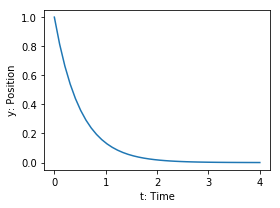

In [11]:

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()

Let us integrate a more complex ODE: a `damped spring-mass oscillator`. The position of a mass attached to a spring obeys the 2nd order ODE 

$$y'' + 2 \varepsilon \omega_0  y' + \omega_0^2 y = 0 $$ with $\omega_0^2 = k/m$ with $k$ the spring constant, $m$ the mass and $\varepsilon = c/(2 m \omega_0)$ with $c$ the damping coefficient. We set:

In [12]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

In [14]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [16]:
# The system is underdamped, as:
eps < 1

True

For `odeint()`, the 2nd order equation needs to be transformed in a system of two first-order equations for the vector $$Y = (y, y')$$: the function computes the velocity and acceleration:

In [17]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])


In [19]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

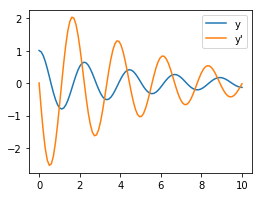

In [22]:

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')

###  Fast Fourier transforms:  ``scipy.fftpack``

The scipy.fftpack module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:

* `scipy.fftpack.fft()` to compute the FFT
* `scipy.fftpack.fftfreq()` to generate the sampling frequencies
* `scipy.fftpack.ifft()` computes the inverse FFT, from frequency space to signal space

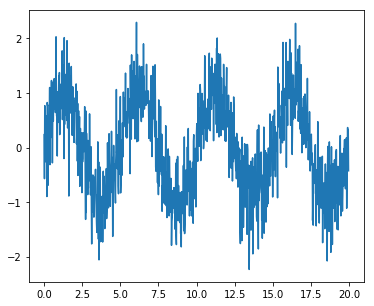

In [23]:
# Generate the noisy signal

# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

True


[]

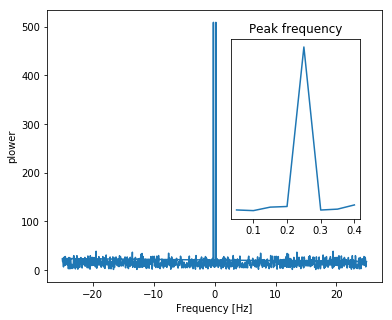

In [26]:
# Compute and plot the power

from scipy import fftpack

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
print(np.allclose(peak_freq, 1./period))

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

e:\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


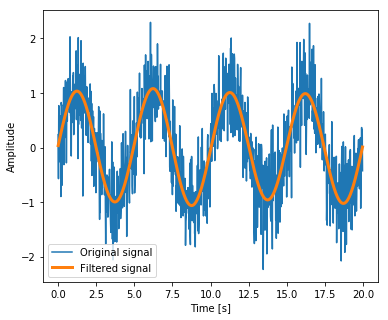

In [27]:
#Remove all the high frequencies

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')